# King County Housing Visualizations

This notebook contains visualizations for the purpose of presenting the business case: presenting the real estate company with the 5 most factors which most impact the price of houses in the area. The goal is to produce a website on which customers can input their values for these 5 known factors, and get an immediate price estimate. The simplicity of 5 factors and the quick estimate without digging into housing data will drive customer traffic to the website, which in turn, depending on the UX team, will generate a new stream of CRM data for potential sellers as clients. Furthermore, it will allow the company to quickly direct potential clients/sellers towards the level of associate best equipped to engage with that particular client.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.stats
from scipy.stats import norm
import geopandas as gpd
import seaborn as sns
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import descartes
from shapely.geometry import Point, Polygon

In [2]:
## Pull in data from master
Data = pd.read_csv('Master_Data_Table_v2.csv')

## Preview data
Data.head()

Unnamed: 0          id  bedrooms  bathrooms  sqft_living   log_lot  \
0           0  7129300520         3       1.00         1180  8.639411   
1           1  6414100192         3       2.25         2570  8.887653   
2           2  5631500400         2       1.00          770  9.210340   
3           3  2487200875         4       3.00         1960  8.517193   
4           4  1954400510         3       2.00         1680  8.997147   

   sqft_lot  floors  waterfront  condition  ...  zipcode      lat     long  \
0      5650     1.0         0.0          3  ...    98178  47.5112 -122.257   
1      7242     2.0         0.0          3  ...    98125  47.7210 -122.319   
2     10000     1.0         0.0          3  ...    98028  47.7379 -122.233   
3      5000     1.0         0.0          5  ...    98136  47.5208 -122.393   
4      8080     1.0         0.0          3  ...    98074  47.6168 -122.045   

   yr_of_last_update  season_sold below_ground_ratio  price_100k  \
0               1955         Fall           0.000000       2.219   
1               1991       Winter           0.184332       5.380   
2               1933       Winter           0.000000       1.800   
3               1965       Winter           0.866667       6.040   
4               1987       Winter           0.000000       5.100   

                         long_lat         district is_seattle  
0             (-122.257, 47.5112)          Seattle        1.0  
1  (-122.319, 47.721000000000004)          Seattle        1.0  
2  (-122.23299999999999, 47.7379)       Northshore        0.0  
3  (-122.39299999999999, 47.5208)          Seattle        1.0  
4             (-122.045, 47.6168)  Lake Washington        0.0  

[5 rows x 21 columns]

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21368 entries, 0 to 21367
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          21368 non-null  int64  
 1   id                  21368 non-null  int64  
 2   bedrooms            21368 non-null  int64  
 3   bathrooms           21368 non-null  float64
 4   sqft_living         21368 non-null  int64  
 5   log_lot             21368 non-null  float64
 6   sqft_lot            21368 non-null  int64  
 7   floors              21368 non-null  float64
 8   waterfront          21368 non-null  float64
 9   condition           21368 non-null  int64  
 10  grade               21368 non-null  int64  
 11  zipcode             21368 non-null  int64  
 12  lat                 21368 non-null  float64
 13  long                21368 non-null  float64
 14  yr_of_last_update   21368 non-null  int64  
 15  season_sold         21368 non-null  object 
 16  belo

In [4]:
Data.describe()

Unnamed: 0            id      bedrooms     bathrooms   sqft_living  \
count  21368.000000  2.136800e+04  21368.000000  21368.000000  21368.000000   
mean   10686.064255  4.586494e+09      3.364283      2.100910   2054.131505   
std     6169.996843  2.877434e+09      0.897322      0.746044    862.926509   
min        0.000000  1.000102e+06      1.000000      0.500000    370.000000   
25%     5343.750000  2.124087e+09      3.000000      1.500000   1420.000000   
50%    10685.500000  3.904995e+09      3.000000      2.250000   1900.000000   
75%    16028.250000  7.320653e+09      4.000000      2.500000   2530.000000   
max    21373.000000  9.900000e+09     11.000000      7.500000   7730.000000   

            log_lot      sqft_lot        floors    waterfront     condition  \
count  21368.000000  2.136800e+04  21368.000000  21368.000000  21368.000000   
mean       8.983332  1.503629e+04      1.491132      0.004586      3.409304   
std        0.901719  4.144848e+04      0.539109      0.067568      0.648943   
min        6.253829  5.200000e+02      1.000000      0.000000      1.000000   
25%        8.522529  5.026750e+03      1.000000      0.000000      3.000000   
50%        8.932873  7.577000e+03      1.500000      0.000000      3.000000   
75%        9.264663  1.055825e+04      2.000000      0.000000      4.000000   
max       14.317109  1.651359e+06      3.500000      1.000000      5.000000   

              grade       zipcode           lat          long  \
count  21368.000000  21368.000000  21368.000000  21368.000000   
mean       7.632067  98078.044131     47.559682   -122.213647   
std        1.133758     53.452234      0.138964      0.141150   
min        3.000000  98001.000000     47.155900   -122.519000   
25%        7.000000  98033.000000     47.469400   -122.329000   
50%        7.000000  98065.000000     47.570950   -122.230000   
75%        8.000000  98118.000000     47.678400   -122.124000   
max       13.000000  98199.000000     47.777600   -121.315000   

       yr_of_last_update  below_ground_ratio    price_100k    is_seattle  
count       21368.000000        21368.000000  21368.000000  21368.000000  
mean         1972.921144            0.196051      5.199383      0.312383  
std            28.893831            0.295566      2.875147      0.463476  
min          1900.000000            0.000000      1.000000      0.000000  
25%          1954.000000            0.000000      3.200000      0.000000  
50%          1977.000000            0.000000      4.500000      0.000000  
75%          1998.000000            0.366836      6.350000      1.000000  
max          2015.000000            2.000000     20.000000      1.000000

In [19]:
price = Data['price_100k']
year = Data['yr_of_last_update']
season_sold = Data['season_sold']
lat = Data['lat']
long = Data['long']
log_price = np.log(price)
price.describe()

count    21368.000000
mean         5.199383
std          2.875147
min          1.000000
25%          3.200000
50%          4.500000
75%          6.350000
max         20.000000
Name: price_100k, dtype: float64

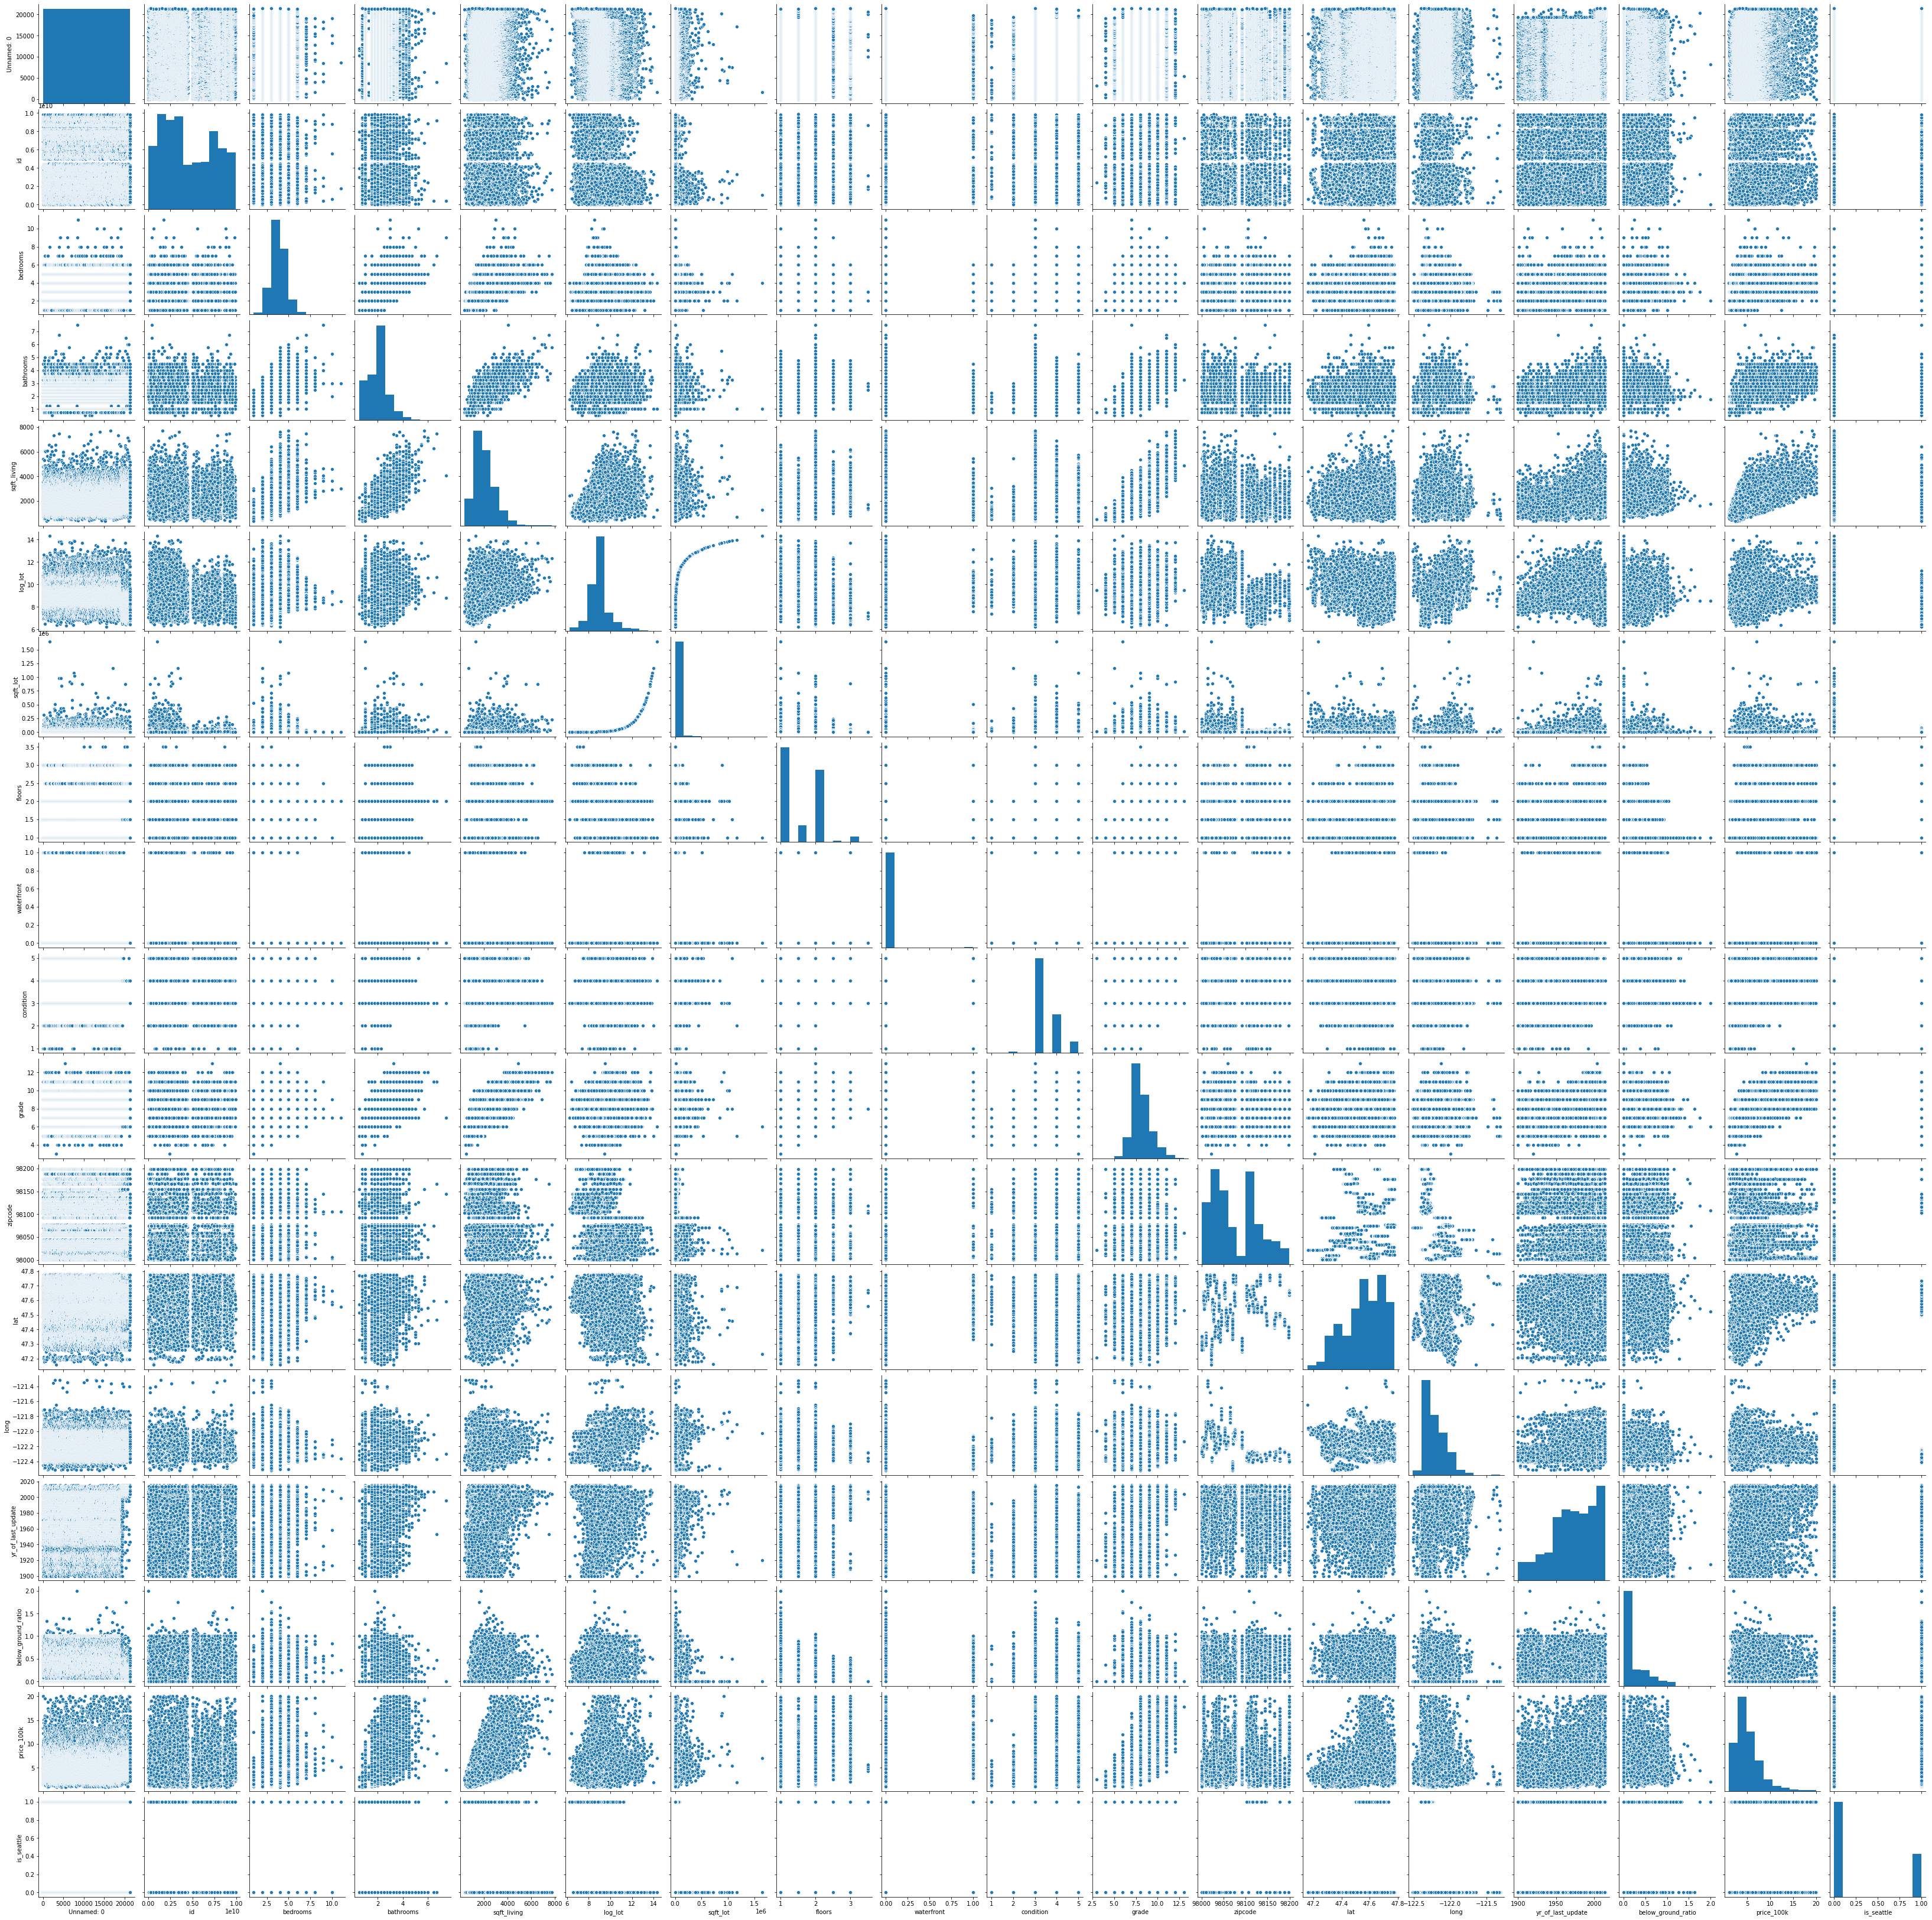

In [16]:
sns.pairplot(data=Data)

## Price Histogram

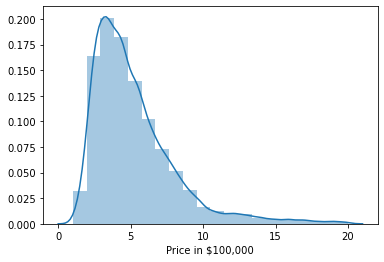

In [15]:
##Plot price data with bins of 20,
sns.distplot(price, bins=20, axlabel='Price in $100,000');
plt.title('King County Home Price Distribution')
plt.ylabel

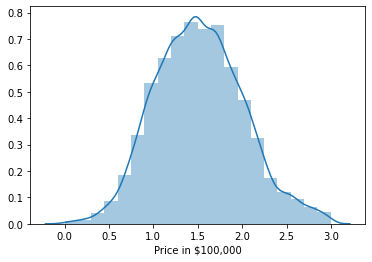

In [14]:
sns.distplot(log_price, bins=20, axlabel='Price in $100,000');

## Latitude - Longitude Heatmap by Price

C:\Anaconda3\envs\project\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

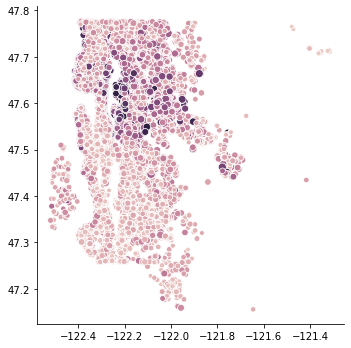

In [27]:
sns.relplot(x=long, y=lat, hue=price, size = Data['sqft_living'], data=Data)

## King County Grade Category vs Price

## Season to Sell vs Price

In [32]:
Data.groupby(season_sold).price_100k.describe()

count      mean       std     min   25%   50%   75%   max
season_sold                                                            
Fall         5006.0  5.105306  2.812075  1.0000  3.15  4.40  6.22  20.0
Spring       6439.0  5.322316  2.923384  1.0000  3.30  4.61  6.50  20.0
Summer       6263.0  5.253357  2.860753  1.0000  3.25  4.52  6.50  20.0
Winter       3660.0  5.019422  2.887383  1.0495  3.10  4.30  6.10  19.9

AttributeError: 'Rectangle' object has no property 'bin'

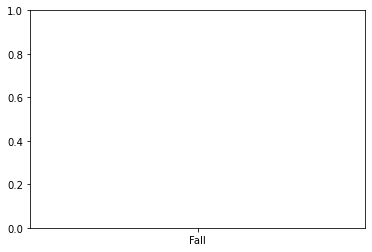